In [9]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


El equivalente en pies es 317.7523498535156


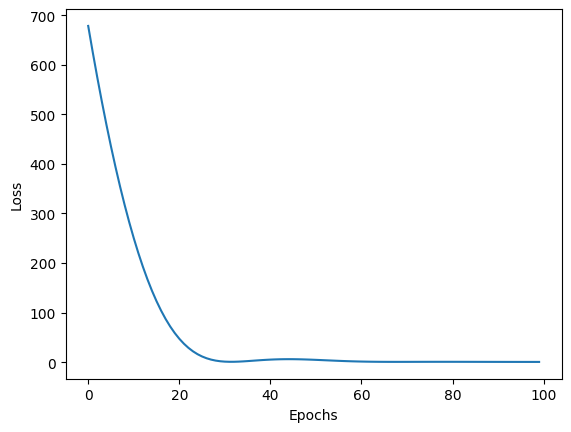

In [10]:

m = np.array([1, 8, 4, 5, 12, 10, 17], dtype=float)
pie = np.array([3.28084, 26.24672, 13.12336, 16.4042, 39.37008, 32.8084, 55.77428], dtype=float)

m = torch.from_numpy(m).view(-1, 1).float()
pie = torch.from_numpy(pie).view(-1, 1).float()

class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearModel()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

epochs = 100
losses = [] # Array to save the losses

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(m)
    loss = criterion(outputs, pie)
    
    loss.backward()
    optimizer.step()

    losses.append(loss.item()) # Save the current loss

model.eval()
m_test = torch.Tensor([100]).view(-1, 1)
pies = model(m_test)

print('El equivalente en pies es ' + str(pies.item()))

# Plotting the loss
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
